<a href="https://colab.research.google.com/github/osetter/ML_course_by_Koroteev/blob/main/ML_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
print(type(california))
print(california.keys())
print(type(california.data), type(california.target))
print(california.data.shape, california.target.shape)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20640, 8) (20640,)


In [4]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [5]:
y = data['Price']
X = data.drop('Price', axis=1)

y.shape, X.shape

((20640,), (20640, 8))

In [8]:
model = LinearRegression()
model.fit(X, y)

print("Coefficients: \n", model.coef_)
print('-------------')
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]
print('-------------')
print("Intercept: \n", model.intercept_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
-------------
MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743
-------------
Intercept: 
 -36.94192020718441


In [9]:
y_pred = model.predict(X)
print(y_pred[:5])
print('-----------------')
print(y[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]
-----------------
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


0.606232685199805

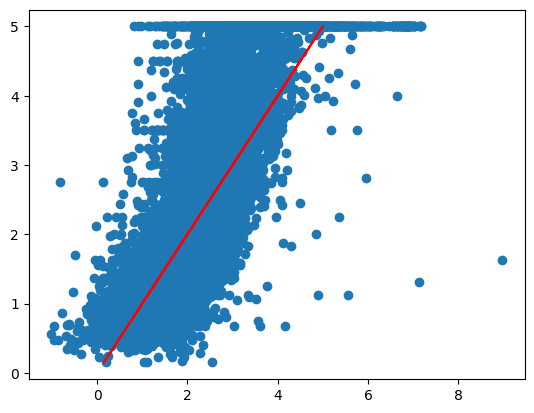

In [10]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')
model.score(X, y)

0.7460745292501869

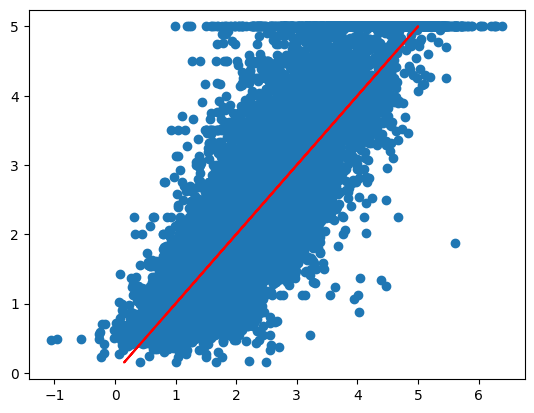

In [11]:
poly = PolynomialFeatures(5).fit_transform(X)
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')
polynomial.score(poly, y)

**Контрольные вопросы.**



*   Отличие применения разных моделей регрессии от моделей классификации в библиотеке sklearn:

В библиотеке scikit-learn (sklearn) модели регрессии и классификации предоставляют различные алгоритмы для решения задач. Модели регрессии предназначены для прогнозирования численных значений (например, предсказание цены), в то время как модели классификации используются для разделения данных на классы (например, определение категории объекта).
*   Коэффициент детерминации для модели регрессии:

Коэффициент детерминации, обозначаемый как R², измеряет долю дисперсии зависимой переменной, которая может быть объяснена моделью регрессии. Значение R² находится в диапазоне от 0 до 1, где 1 означает идеальное предсказание, а 0 означает, что модель не объясняет вариацию зависимой переменной.


*   Значение коэффициентов линейной регрессии:

В линейной регрессии коэффициенты представляют собой веса, присваиваемые каждому признаку (переменной) в модели. Каждый коэффициент отражает вклад соответствующего признака в предсказание целевой переменной. Например, в простой линейной регрессии уравнение имеет вид: y = mx + b, где m - это коэффициент наклона (вес при признаке x), а b - коэффициент сдвига (пересечение с осью y).
*   Атрибуты объекта линейной регрессии:

Объект линейной регрессии в sklearn обладает различными атрибутами, включая:
coef_: Массив коэффициентов наклона (весов) для каждого признака.
intercept_: Значение коэффициента сдвига (пересечение с осью y).
predict(X): Метод, который позволяет делать предсказания на новых данных X.
score(X, y): Метод, возвращающий коэффициент детерминации R² для предсказанных значений на данных X по сравнению с истинными значениями y.





**Задания для самостоятельного выполнения**

1)Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Метрики для обычной линейной регрессии
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)


MAE: 0.5311643817546476
MSE: 0.5243209861846072
R-squared: 0.606232685199805


2)Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели: 2.1-Метод опорных векторов 2.1.1-Без ядра 2.1.2-С гауссовым ядром 2.1.3-С полиномиальным ядром 2.2-Метод ближайших соседей 2.3-Многослойный перцептрон 2.4-Дерево решений 2.5-Другие методы 2.5.1-Гребневую регрессию 2.5.2-Регрессию Лассо 2.5.3-Регрессию ElasticNet 2.5.4-Случайный лес 2.5.5-Беггинг

In [13]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обновленный словарь моделей
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression (linear)": SVR(kernel='linear'),
    "Support Vector Regression (rbf)": SVR(kernel='rbf'),
    "Support Vector Regression (poly)": SVR(kernel='poly', degree=3),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bagging": BaggingRegressor()
}

#Обновленная функция для обучения и оценки моделей
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        results[name] = score

        # Визуализация регрессии
        y_pred_model = model.predict(X_test)
        plt.scatter(y_pred_model, y_test)
        plt.title(f"{name} - R-squared: {score:.2f}")
        plt.xlabel("Predicted Prices")
        plt.ylabel("Actual Prices")
        plt.show()

    return results

# Обучение и оценка моделей
results = train_and_evaluate_models(X_train, y_train, X_test, y_test)

# Вывод результатов
print("\nModel Scores:")
for name, score in results.items():
    print(f"{name}: {score:.2f}")


3)Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [ ]:
def train_and_evaluate_models(X, y):
    results = {}

    for name, model in models.items():
        model.fit(X, y)
        score = model.score(X, y)
        results[name] = score

    return results

results = train_and_evaluate_models(X, y)
print("Model Scores:")
for name, score in results.items():
    print(f"{name}: {score:.2f}")


4)Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Загрузка данных diabetes
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Нормализация данных
scaler_diabetes = StandardScaler()
X_diabetes_scaled = scaler_diabetes.fit_transform(X_diabetes)

# Разделение данных
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42
)

# Словарь моделей
models_diabetes = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Support Vector Regression (linear)": SVR(kernel='linear'),
    "Support Vector Regression (rbf)": SVR(kernel='rbf'),
    "Support Vector Regression (poly)": SVR(kernel='poly', degree=3),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Multi-layer Perceptron": MLPRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor()
}

# Функция для обучения и оценки моделей
def train_and_evaluate_models_diabetes(X_train, y_train, X_test, y_test):
    results = {}

    for name, model in models_diabetes.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        results[name] = score

        # Визуализация регрессии
        plt.scatter(y_pred, y_test)
        plt.title(f"{name} - R-squared: {score:.2f}")
        plt.xlabel("Predicted Values")
        plt.ylabel("Actual Values")
        plt.show()

    return results

# Обучение и оценка моделей для diabetes
results_diabetes = train_and_evaluate_models_diabetes(
    X_train_diabetes, y_train_diabetes, X_test_diabetes, y_test_diabetes
)

# Вывод результатов
print("\nModel Scores for Diabetes Dataset:")
for name, score in results_diabetes.items():
    print(f"{name}: {score:.2f}")
